In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# import os
# os.chdir('..')
import utils as ut
# os.chdir('notebooks')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout, LSTM, Dense, Embedding

In [ ]:
texts = ut.load_text_data('preprocessed_data.csv')
encoded_tokens = ut.tokenize_texts(texts)
num_words = len(ut.tokenizer.word_index)+1
n_prev = 50

In [ ]:
X_train, X_test, y_train, y_test = ut.get_train_test_split(encoded_tokens, 50)
X_train = X_train[:150000]
X_test = X_test[:30000]
y_train = y_train[:150000]
y_test = y_test[:30000]
y_train = to_categorical(y_train, num_classes = num_words)
y_test = to_categorical(y_test, num_classes = num_words)

In [ ]:
model = ut.create_model(num_words, n_prev)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           3171200   
_________________________________________________________________
lstm (LSTM)                  (None, 50, 128)           131584    
_________________________________________________________________
dropout (Dropout)            (None, 50, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24775)             3195975   
Total params: 6,630,343
Trainable params: 6,630,343
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/40
4688/4688 [==============================] - 174s 36ms/step - loss: 7.1665 - accuracy: 0.0696 - val_loss: 7.0503 - val_accuracy: 0.0763
Epoch 2/40
4688/4688 [==============================] - 167s 36ms/step - loss: 6.7981 - accuracy: 0.0876 - val_loss: 7.0637 - val_accuracy: 0.0992
Epoch 3/40
4688/4688 [==============================] - 168s 36ms/step - loss: 6.6574 - accuracy: 0.0955 - val_loss: 7.0573 - val_accuracy: 0.1026
Epoch 4/40
4688/4688 [==============================] - 168s 36ms/step - loss: 6.5525 - accuracy: 0.0982 - val_loss: 7.0333 - val_accuracy: 0.1050
Epoch 5/40
4688/4688 [==============================] - 167s 36ms/step - loss: 6.4736 - accuracy: 0.1001 - val_loss: 6.9922 - val_accuracy: 0.1067
Epoch 6/40
4688/4688 [==============================] - 166s 35ms/step - loss: 6.4017 - accuracy: 0.1028 - val_loss: 6.9828 - val_accuracy: 0.1083
Epoch 7/40
4688/4688 [==============================] - 167s 36ms/step - loss: 6.3369 - accuracy: 0.1049 - val_loss: 6

In [ ]:
prompt = 'Once upon a midnight dreary, while I pondered, weak and weary,'

In [ ]:
ut.generate_poetry_words(prompt, 20, 1, model)

the most important of the germain was the most was been of the animaux and the under—the patron of the


In [ ]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
epochs = np.arange(0,len(val_loss))

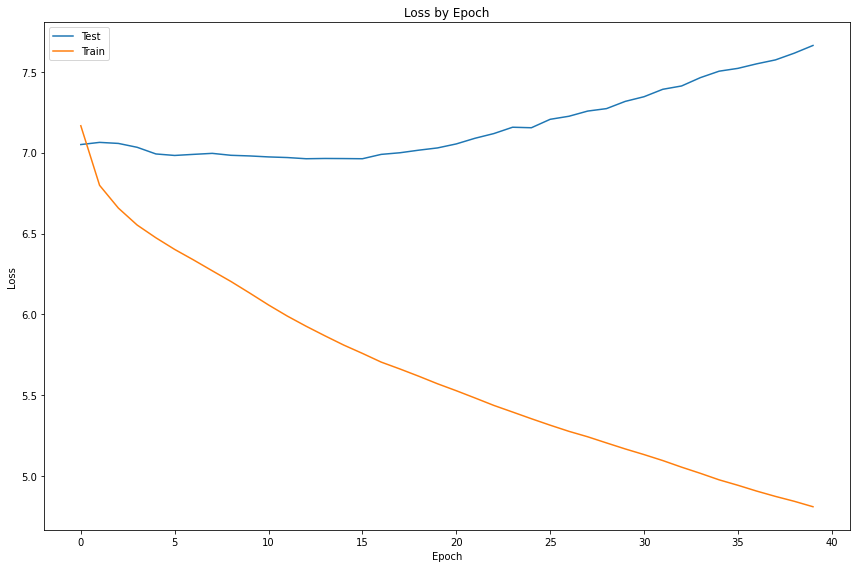

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(epochs, val_loss, label='Test')
ax.plot(epochs, train_loss, label='Train')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss by Epoch')
ax.legend()
fig.tight_layout()

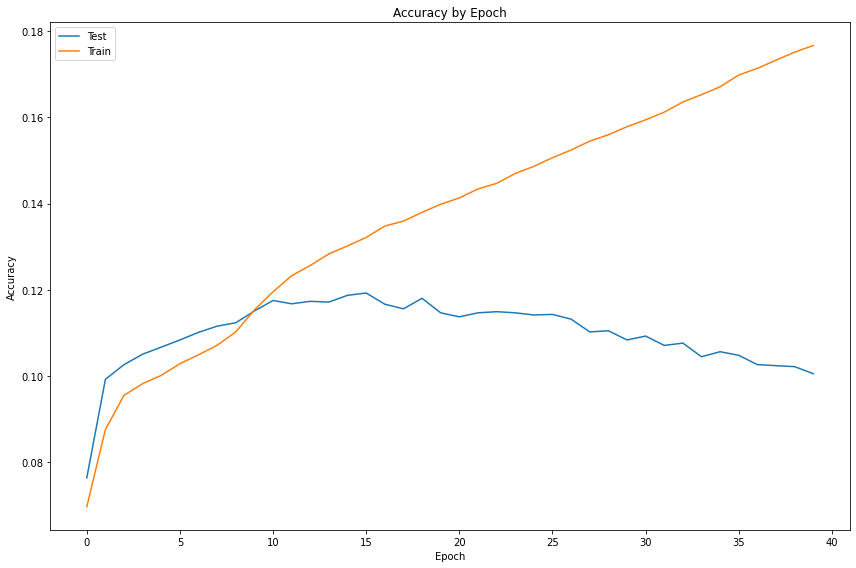

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(epochs, val_acc, label='Test')
ax.plot(epochs, train_acc, label='Train')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Epoch')
ax.legend()
fig.tight_layout()